Modely
============

smysl statistických modelů je 

- redukovat (komprimovat) data - popsat výsledek měření několika parametry
- činit předpovědi - pokud závěry učiněné na daném vzorku extrapolujeme na zbytek populace
- lze parametrizovat i simulovaná data (ušetření výpočetního času)

paradigma: *získání spolehlivých údajů z nedokonalých dat*


mohou být 

- parametrické (tušíme funkční závislost) 
- neparametrické (vyhlazování / kubický spline)



$Y=r(X) + e$, $r(X)$ je nějaký model

pro "správný" model platí $E(e)=0$, i když obecně rozdělení $e$ závisí na $X$

z daného vzorku máme jen odhad $\hat{r}(X)$, který se liší od skutečné $r(X)$ vlivem nejistot parametrů (a použití jen konečného vzorku pro jejich odhad, což dává možný **bias**)

$$V(Y-\hat{r}) = \sigma^2 +  E((\hat{r}-r)^2)= \sigma^2 +  (E(\hat{r})-r)^2 + V(\hat{r})$$

**bias - variance decomposition** &ndash; větší počet parametrů snižuje rezidua, ale zvyšuje nejistoty modelu (v důsledku korelací parametrů)


#### lineární model:
mnohorozměrná regrese je analogií vzorce pro proložení přímkou ($\sigma^2_{xy}/\sigma^2_{xx}$)

$$\beta= V^{-1} D(\vec{X},Y)$$

(platí po "vycentrování" komponent modelu $\vec{X}$ a měření $Y$) 

transformace pomocí $V^{-1}$ odstraňuje vazby mezi komponentami modelu

vektor reziduí $Y-\beta X$ musí být dekorelován (ortogonální) s vektorem $\vec{X}$

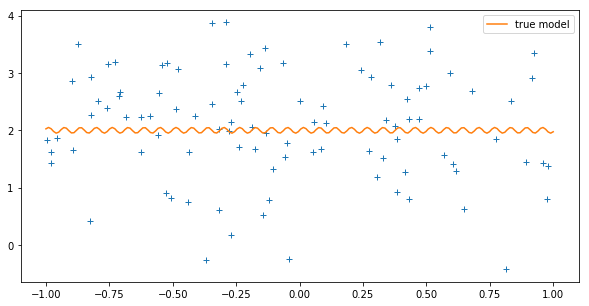

In [3]:
%matplotlib inline
from matplotlib.pyplot import *
import matplotlib
from numpy import array,r_,sin
matplotlib.rcParams['figure.figsize'] = [10, 5]
from numpy import random
freq=100
func=lambda x:2+0.05*sin(freq*x)
x=random.uniform(-1,1,size=100)
rx=r_[-1:1:200j]
y=func(x)+random.normal(0,1,x.size)
plot(x,y,'+')
plot(rx,func(rx),label="true model")
ok=legend()

In [5]:
model=array([ones(x.size),x,sin(freq*x)]).T
covr=inv(model.T.dot(model))
errs=sqrt(covr.diagonal())
pars=covr.dot(model.T.dot(y))
dif=((y-model.dot(pars))**2).sum()
print("parametry,nejistoty,rezid. suma")
pars,errs,dif

parametry,nejistoty,rezid. suma


(array([ 2.08966209, -0.05047858,  0.11152736]),
 array([ 0.10064753,  0.15847813,  0.1522184 ]),
 112.51524941476872)

In [4]:
covr/errs.reshape(1,3)/errs.reshape(3,1)

array([[ 1.        , -0.01238217, -0.00349425],
       [-0.01238217,  1.        ,  0.07150181],
       [-0.00349425,  0.07150181,  1.        ]])

porovnání s konstantním modelem (ekvivalent aritmetického průměru)

In [8]:
modelc=array([ones(x.size)]).T
covrc=inv(modelc.T.dot(modelc))
errsc=sqrt(covrc.diagonal())
parsc=covrc.dot(modelc.T.dot(y))
difc=((y-modelc.dot(parsc))**2).sum()
parsc,errsc,difc

(array([ 2.08065144]), array([ 0.1]), 113.23512939040886)

event. lineárním modelem (bez periodické funkce)

In [7]:
modell=array([ones(x.size),x]).T
covrl=inv(modell.T.dot(modell))
errsl=sqrt(covrl.diagonal())
parsl=covrl.dot(modell.T.dot(y))
difl=((y-modell.dot(parsl))**2).sum()
parsl,errsl,difl

(array([ 2.08141319, -0.06710682]),
 array([ 0.10001585,  0.15684466]),
 113.05206925264098)

konstrukce modelu
---------------------

máme-li diskrétní hodnoty (kategorie) - může stačit *pruměrování* (očekávaná hodnota) a rozptyl v rámci kategorie 

v praxi spíš hledáme pro model spojitou funkci (interpolace mezi měřenými hodnotami)

- hledáme funkce z nějaké množiny "rozumných"

otázka "jak přesně sledujeme data" vede k vyvažování vztahu "*bias-variance*" ...

lineární model $r = A H^{-1} A^T Y$ patří do skupiny lineárního vyhlazování (*linear smoother*) daného obecnější formulí

$$ \hat{r}(x) = \sum_i {y_i\ w(x_i,x)} $$ 

(uvedený maticový zápis dává hodnoty jen v bodech měřeni, první modelovou matici ale lze nahradit vektorem funkcí $a_i(x)$ a dostaneme funkci $r(x)$)

pro polynom řádu 1 máme $w(x_i,x)=(x_i/n s^2_x) x$ (platí pro centrovanou nezávislou proměnnou $\bar x=0$)

### další příklady 
#### k-nejbližších sousedů

$w(x_i,x)=1/k$ pokud jde o jednoho z k sousedů bodu $x$, jinak 0

#### vyhlazování s kernelem

$w(x_i,x)=K(x-x_i)/\sum_j K(x-x_j)$, kde nezáporný **kernel** splňuje podmínky
$\int x K(x) dx=0$, $\int x^2 K(x) dx< \infty$

pro rovnoměrně rozdělená data vypadá jako konvoluce

parametrizace
---------------

náš odhad parametrů $\theta$ minimalizuje "loss function" $L(\bf{z}_n;\theta)$ (může to být např. záporný logaritmus věrohodnosti) v prostoru parametrů

tato funkce se pro každý vzorek (měření) $\bf{z}_n$ liší od její "střední hodnoty" určované nad celou populací dat $\bf{Z}$ (a která by minimalizací 
dala *skutečné* hodnoty parametrů)

$$L(\bf{z}_n;\theta)=E(L(\bf{Z};\theta)) + \eta_n(\theta)$$

druhý člen je náhodná odchylka pro daný konečný vzorek $\bf{z}_n$


### skryté a přebytečné proměnné

rozdíl mezi věrohodností třídy $\pi$ modelů obecnějších a $\rho$ modelů s omezenými (fixovanými)
parametry je úměrný $\chi^2_{p-q}$ (p-q je počet fixovaných parametrů)


rezidua jsou z definice nekorelována s modelem (nezávislými parametry), nicméně by měly splňovat také podmínky pro **bílý šum**

- normální rozdělení
- *stejné* rozdělení (zejména rozptyl) pro různá x
- navzájem nekorelované

testování dalších parametrů 

- t-test parametrů s nejistotami
- F-test tříd modelů

kovarianční matice klesá s 1/N (objemem měřených dat), stále více parametrů může být 
statisticky významných, ale skutečné fyzikální mechanismy na velikosti vzorku nezávisí

- *přidání dalšího parametru do modelu musí mít fyzikální opodstatnění*
- pouhá korelace neznamená příčinnou souvislost
- pokud není splněna podmínka normálnosti rozdělení parametrů, standardní testy nepomůžou (lze aplikovat *bootstraping*)


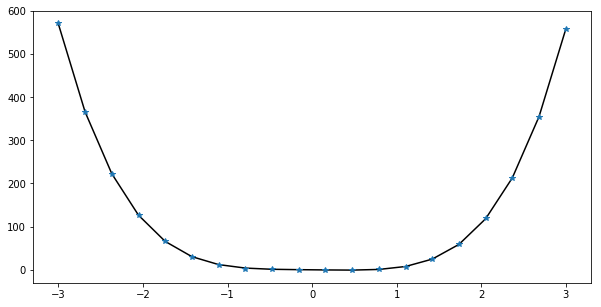

In [10]:
from numpy import polyfit,polyval,arange
x=r_[-3:3:20j]
#x=random.uniform(-3,3,20)
tres=[7,0,-.5,-2,0]
ytrue=polyval(tres,x)
plot(x,ytrue,'k')
y=ytrue+random.normal(size=x.shape)
plot(x,y,'*')
ords=arange(1,10)
res=[polyfit(x,y,i,cov=True) for i in ords]
#[[round(p,3) for p in r[0][::-1]] for r in res]

**validace** spočívá v aplikaci modelů na nový vzorek dat

pokud nemáme nový vzorek, můžeme dělat podvýběry ze stávajícího 

- rozdělení na poloviny, obecněji *k*-dílů, jeden díl se použije na testování
- jackknife ([viz](http://nymeria.physics.muni.cz/face/praxis/fdoc/id393/) redukce biasu)
- [bootstrap](http://nymeria.physics.muni.cz/face/praxis/fdoc/id394/)

Text(0.5,0,'stup. polynomu modelu')

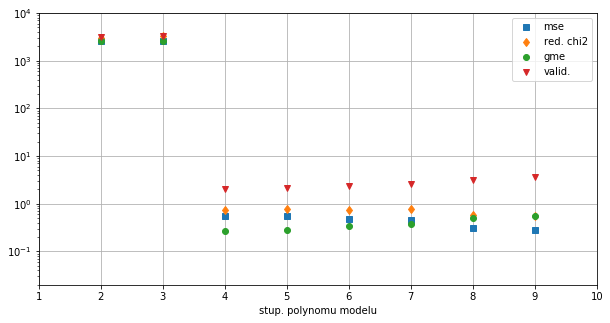

In [15]:
chi2=r_[[((y-polyval(res[i-1][0],x))**2).sum()/(len(x)) for i in ords]]
semilogy(ords,chi2,'s')
grid()
semilogy(ords,chi2/(len(x)-ords-1)*len(x),'d')
ynew=ytrue+random.normal(size=x.shape)
gme=r_[[((ytrue-polyval(res[i-1][0],x))**2).sum()/(len(x)) for i in ords]]
semilogy(ords,gme,'o')#,fillcolor=None)
valme=r_[[((ynew-polyval(res[i-1][0],x))**2).sum()/(len(x)-i-1) for i in ords]]
semilogy(ords,valme,'v')
legend(['mse','red. chi2','gme','valid.'])
ylim(0.02,10000)
xlim(1,10)
xlabel("stup. polynomu modelu")
#savefig("/tmp/general_err.png",dpi=100)

**legenda**

- mse = průměrná hodnota čtverce rezidua
- red. chi2 = suma čtverců reziduí dělená počtem stupňů volnosti
- valid. = suma čtverců reziduí u nové (validační) sady dat
- gme = generalizační chyba - suma čtverců reziduí modelu a skutečné střední hodnoty $y$